In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-01-28 11:14:30--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.2’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M  16.9MB/s    in 24s     

2023-01-28 11:14:55 (17.1 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.2’ saved [430460776/430460776]

(Reading database ... 129499 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gn

In [ ]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

--2023-01-28 11:15:56--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip.1’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.002s  

2023-01-28 11:15:56 (35.3 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip.1’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcn

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Lane Detection/blue line detection/St_3_Input_A.mp4')
#cap1 = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Lane Detection/blue line detection/St_3_Input_A.mp4')

i = 0
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH )
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps =  cap.get(cv2.CAP_PROP_FPS)
print(width)
print(height)
print(fps)

out = cv2.VideoWriter('outputTrain.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30.0, (1080,720))

test_model, inference_config = load_inference_model(1, '/content/drive/MyDrive/Colab Notebooks/Lane Detection/blue line detection/mask_rcnn_object_0004.h5')
test_model1, inference_config1 = load_inference_model(1, '/content/drive/MyDrive/Colab Notebooks/Lane Detection/blue line detection/mask_rcnn_object_0005.h5')

1080.0
720.0
30.0


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/drive/MyDrive/Colab Notebooks/Lane Detection/blue line detection/mask_rcnn_object_0004.h5
Loading weights from  /content/drive/MyDrive/Colab Notebooks/Lane Detection/blue line detection/mask_rcnn_object_0005.h5


In [ ]:
    def BlueMask2TrainLine(muskedimg):
        blur = cv2.GaussianBlur(muskedimg, (5, 5), 0)
        # cv2_imshow(blig)

        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

        lower_blue = np.array([115, 50, 50])
        upper_blue = np.array([130, 255, 255])

        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        outputt = cv2.bitwise_and(frame, frame, mask=mask)
        return outputt
    
    def objectdetection(afterunmuskedtheimg, test_model1):
        k = cv2.cvtColor(afterunmuskedtheimg, cv2.COLOR_BGR2RGB)
        # Detect results
        r1 = test_model1.detect([k])[0]
        colors1 = random_colors(1)

        object_count = len(r1["class_ids"])
        for t in range(object_count):
            # 1. Mask
            mask1 = r1["masks"][:, :, t]
            contours = get_mask_contours(mask1)
            for cnt in contours:
                cv2.polylines(afterunmuskedtheimg, [cnt], True, colors1[t], 2)
                afterunmuskedtheimg = draw_mask(afterunmuskedtheimg, [cnt], colors1[t])
        return afterunmuskedtheimg

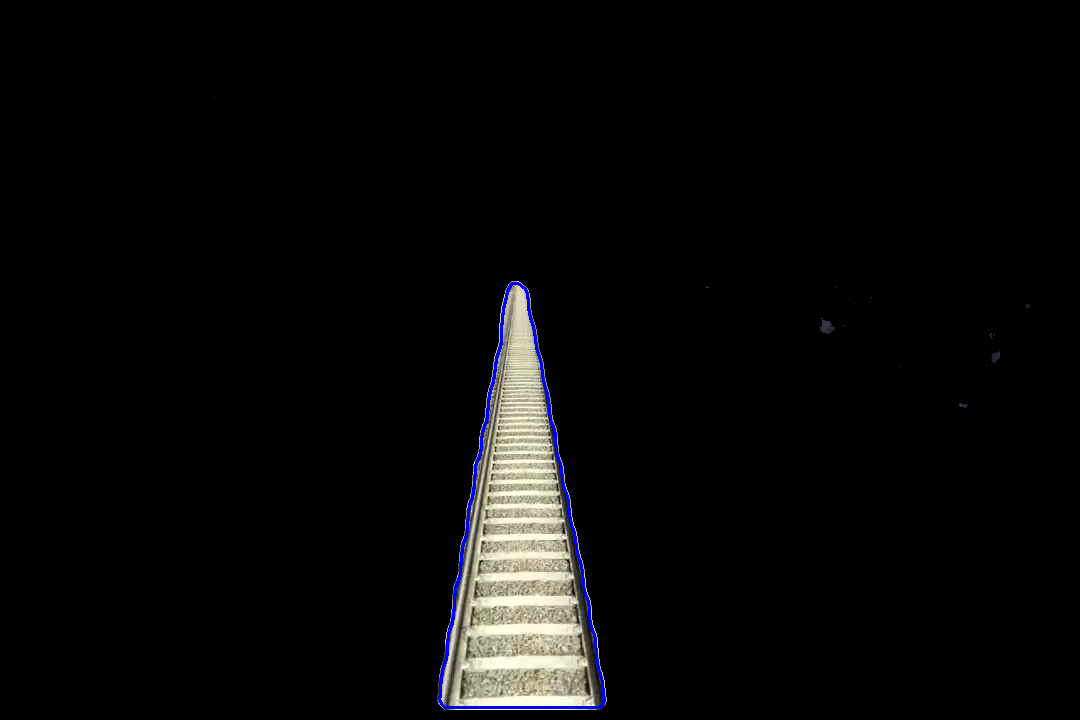

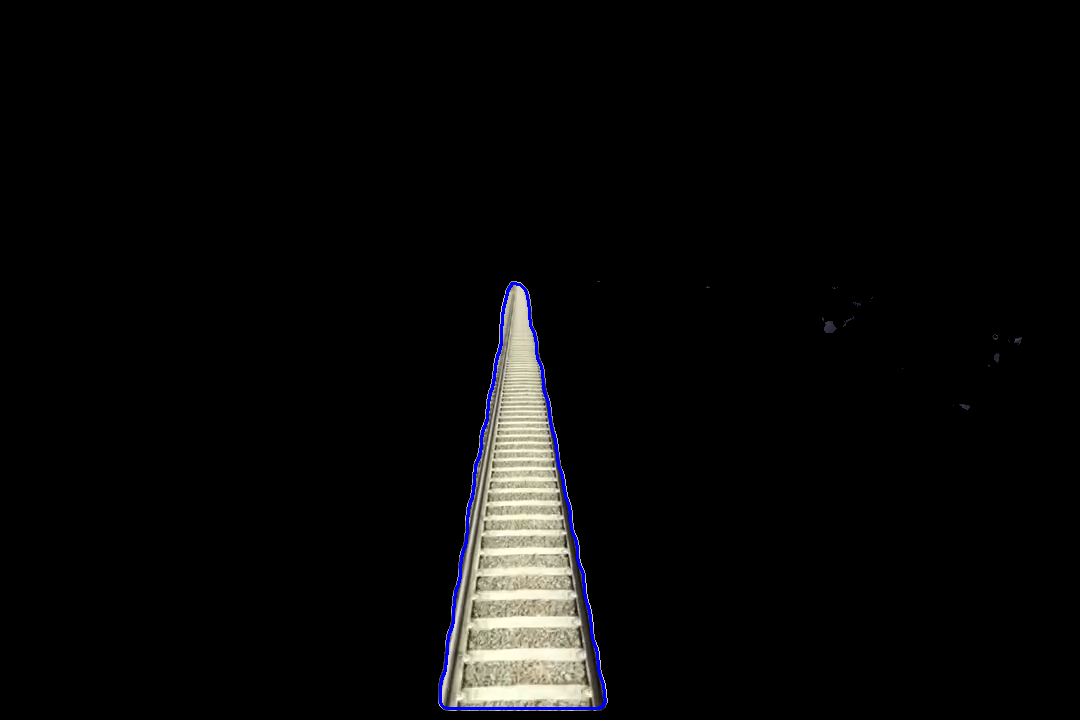

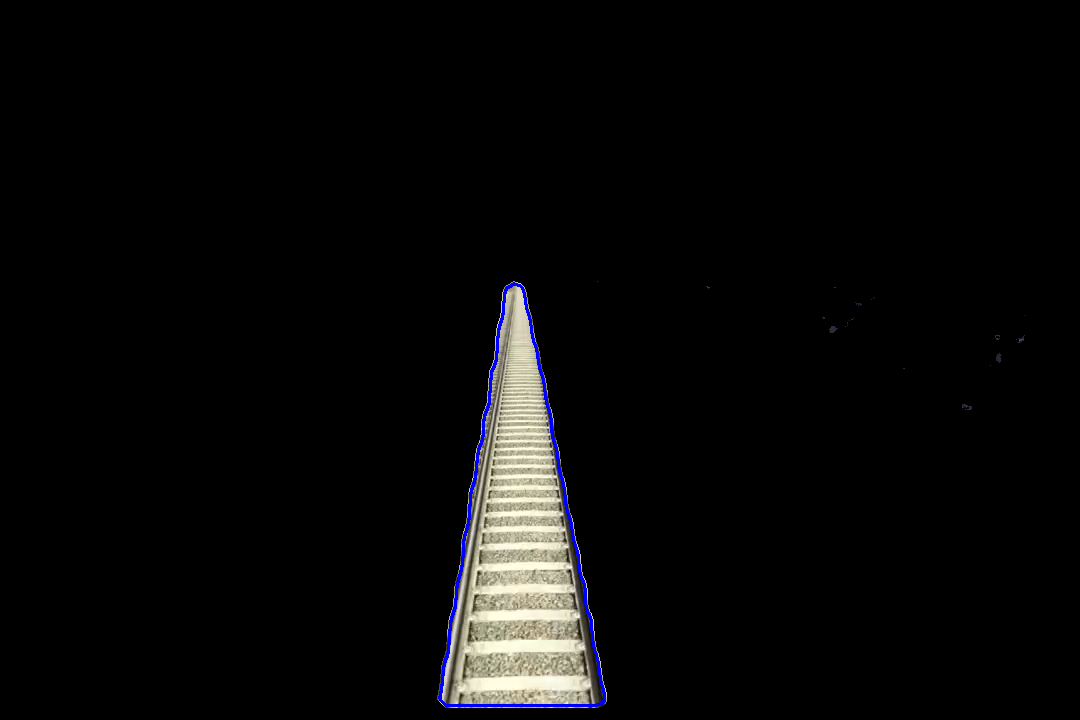

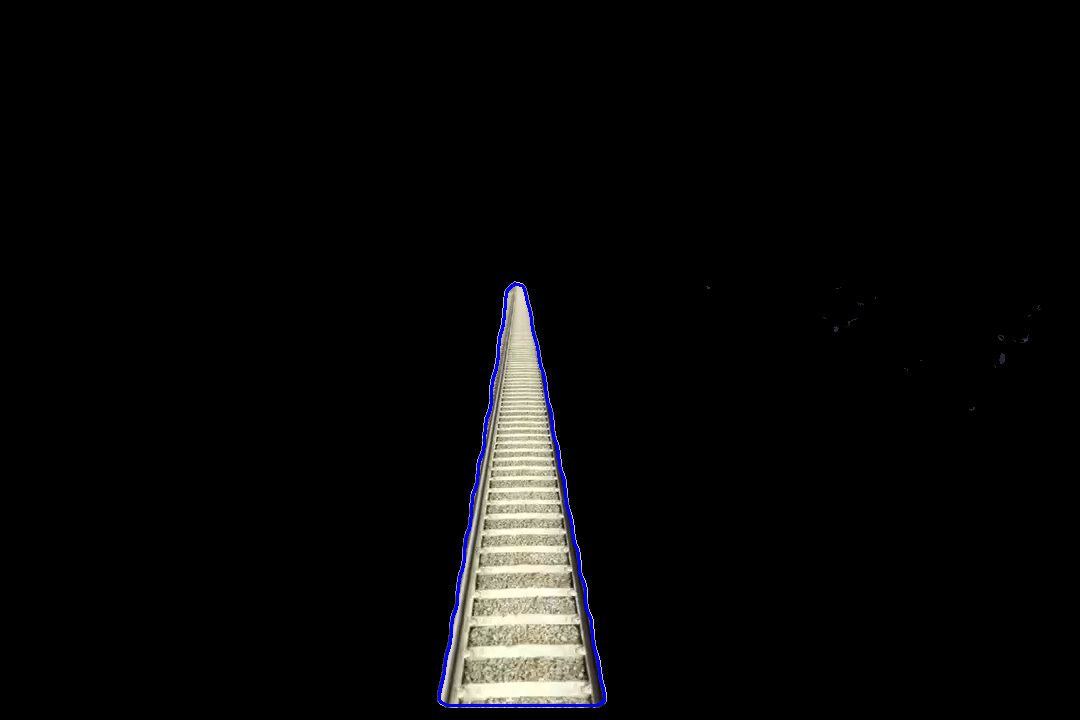

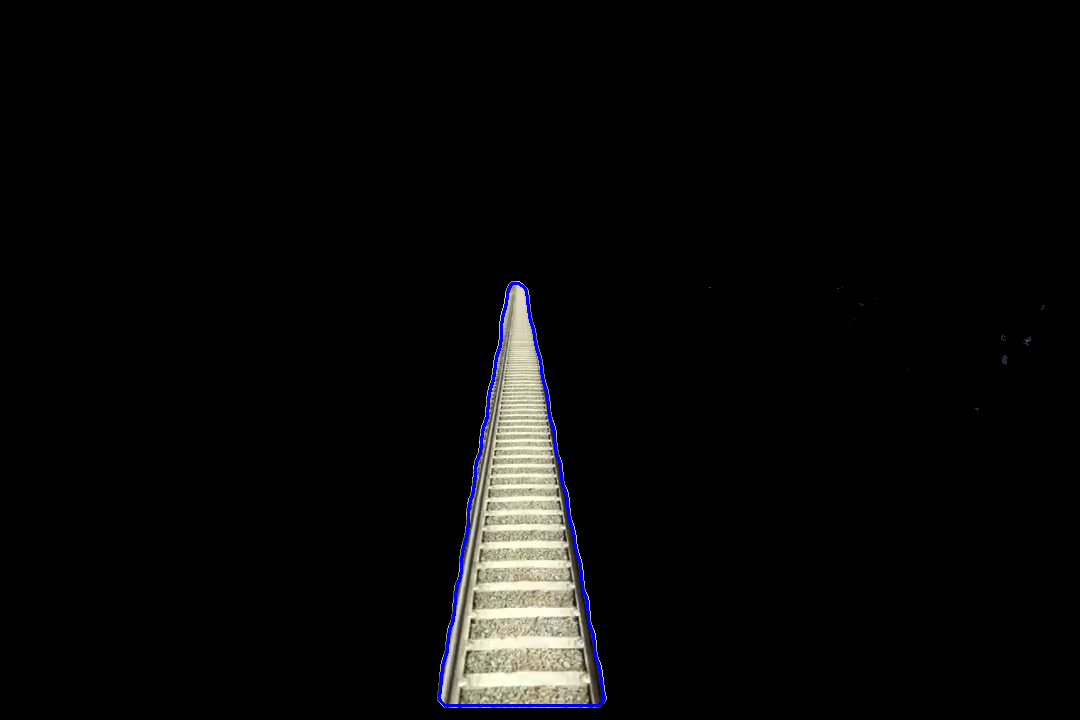

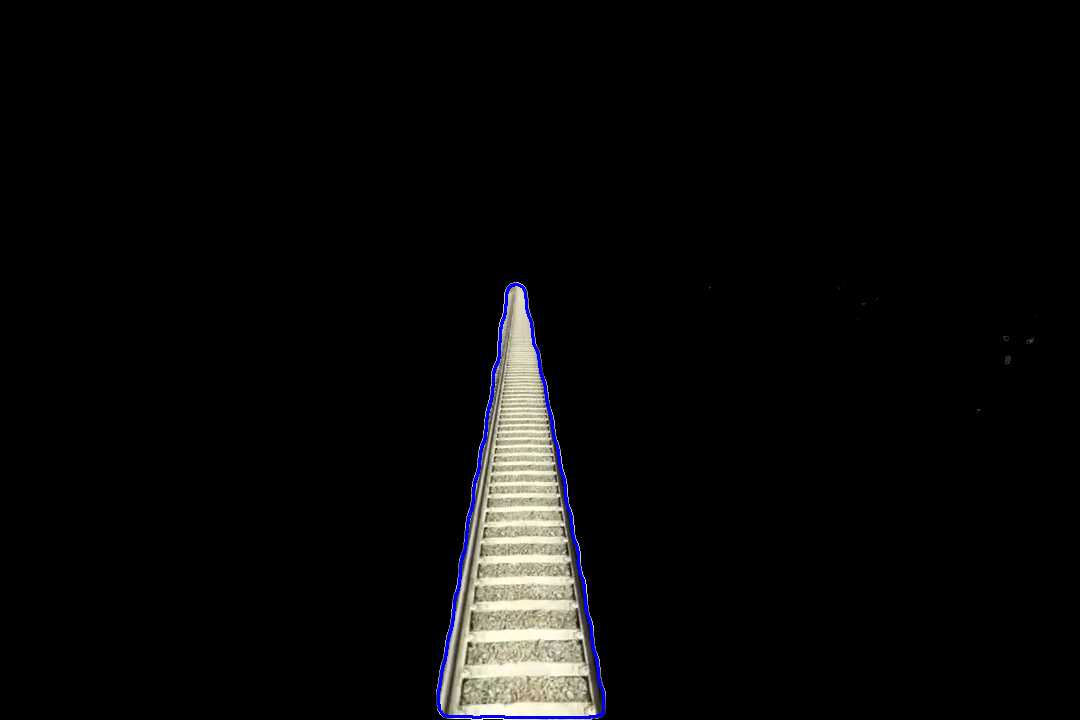

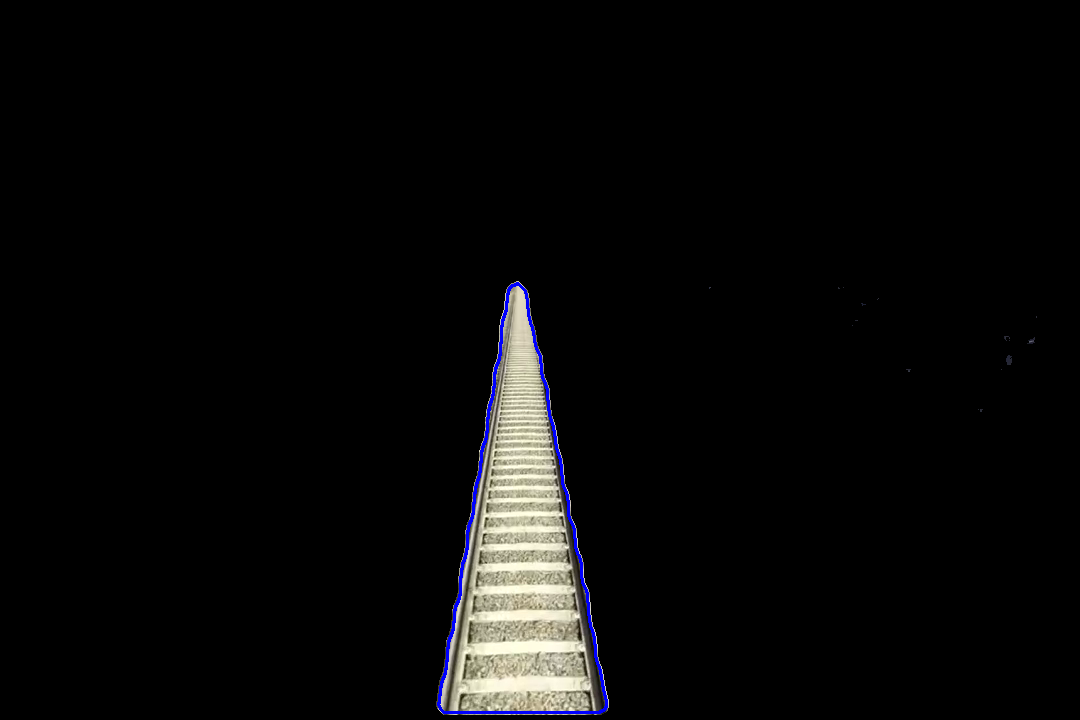

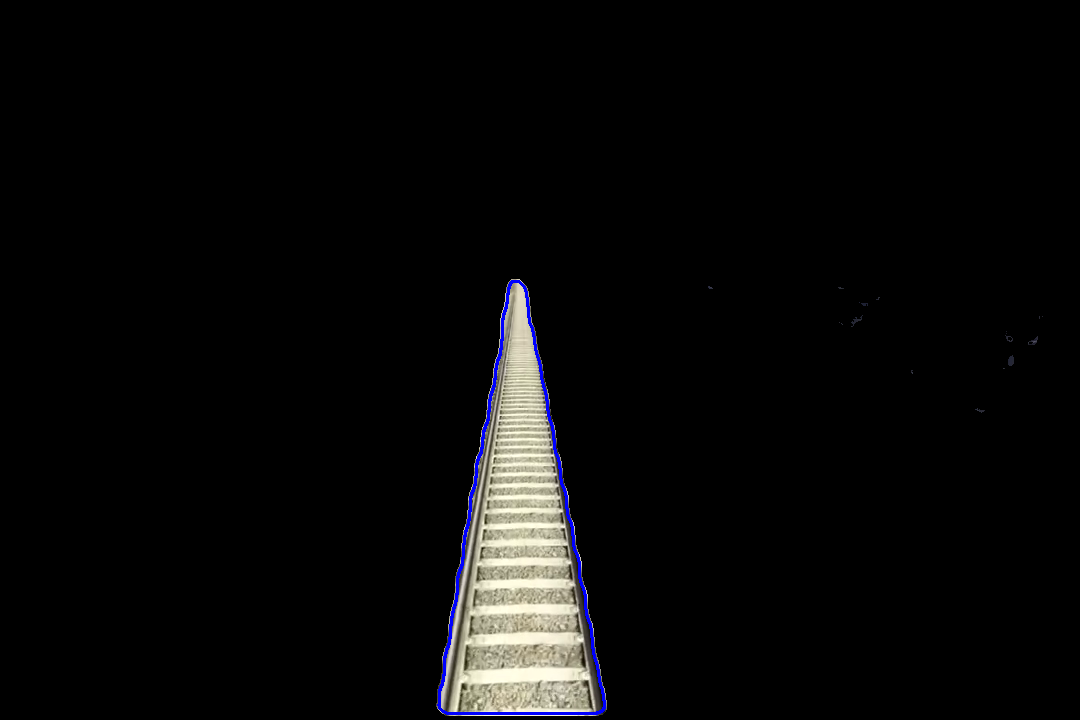

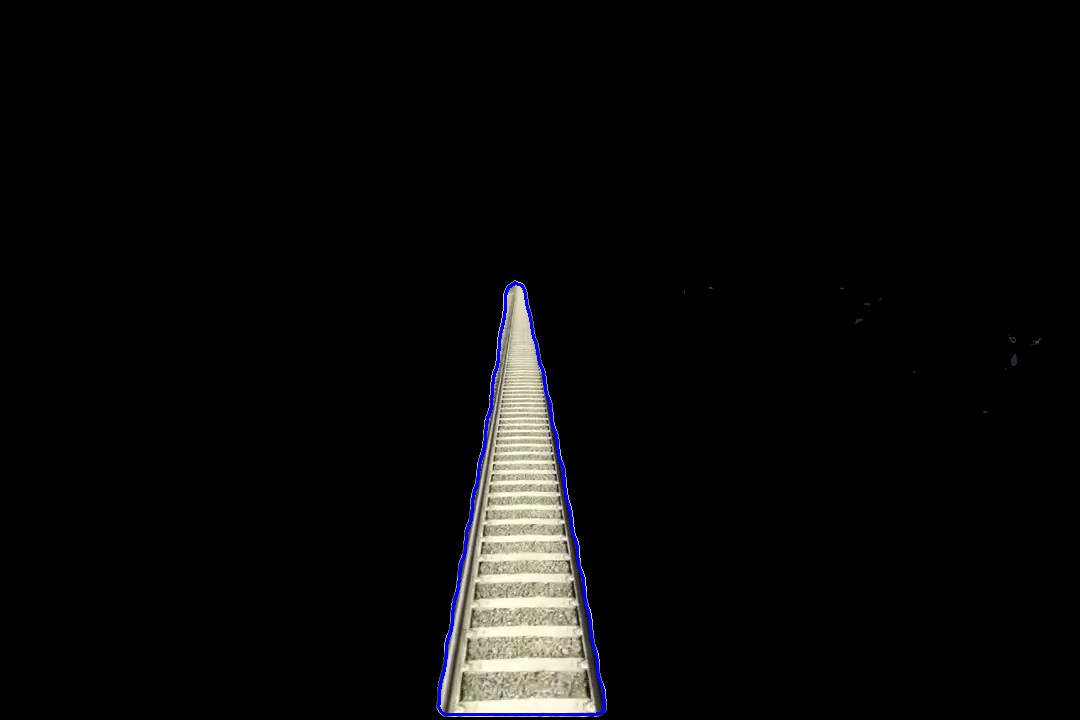

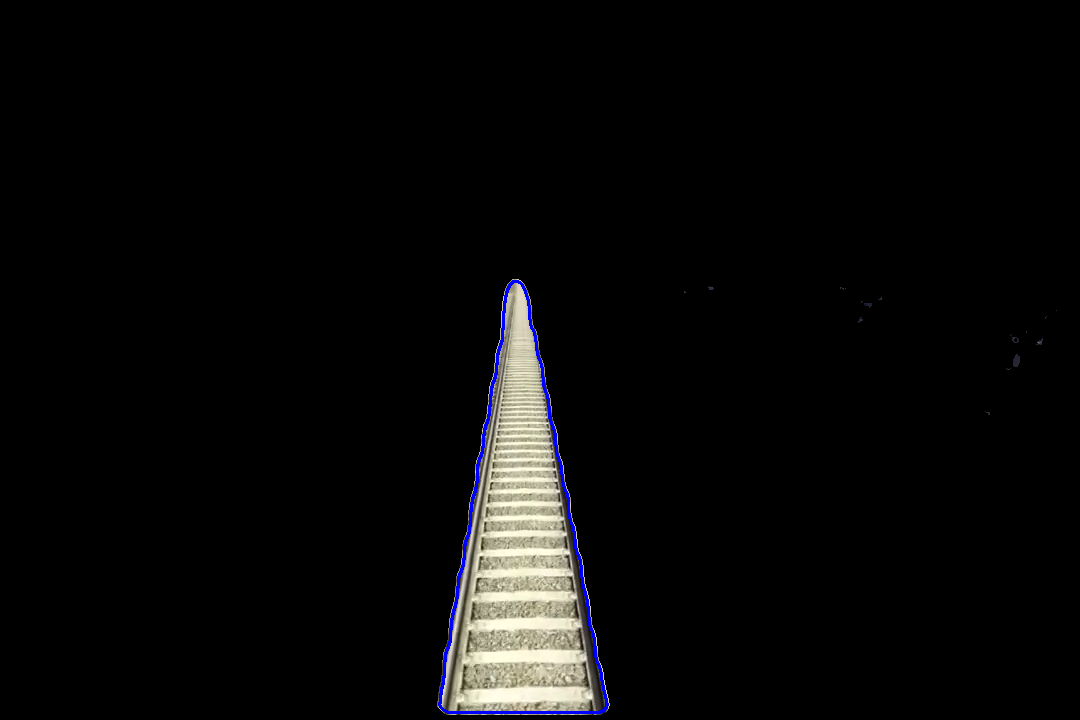

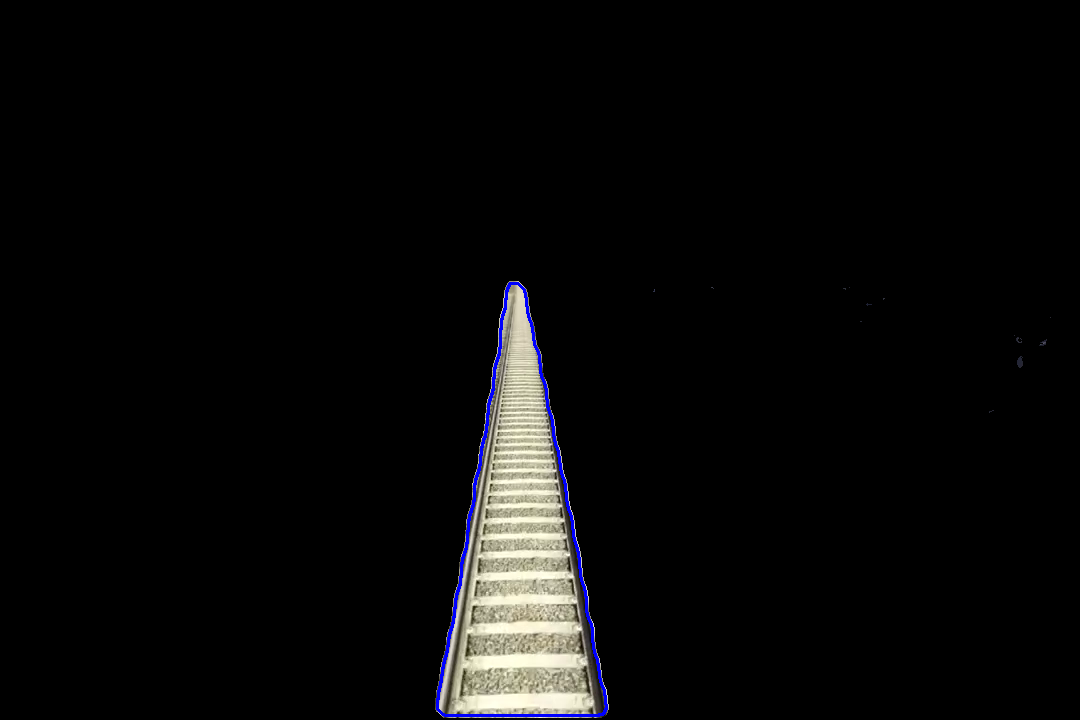

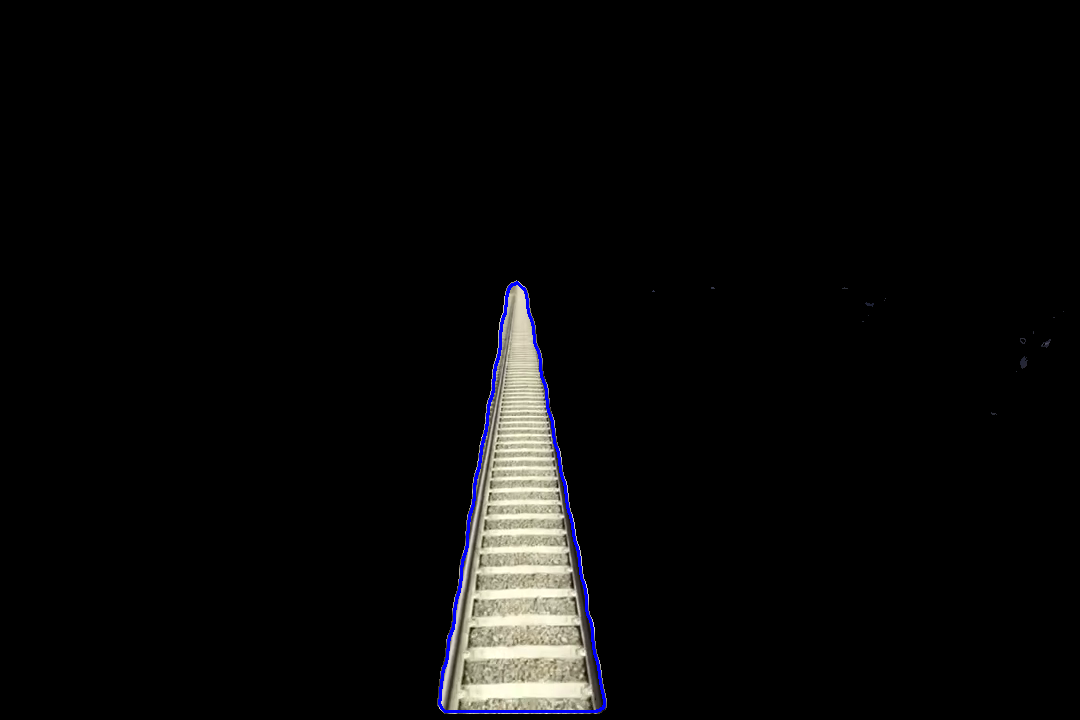

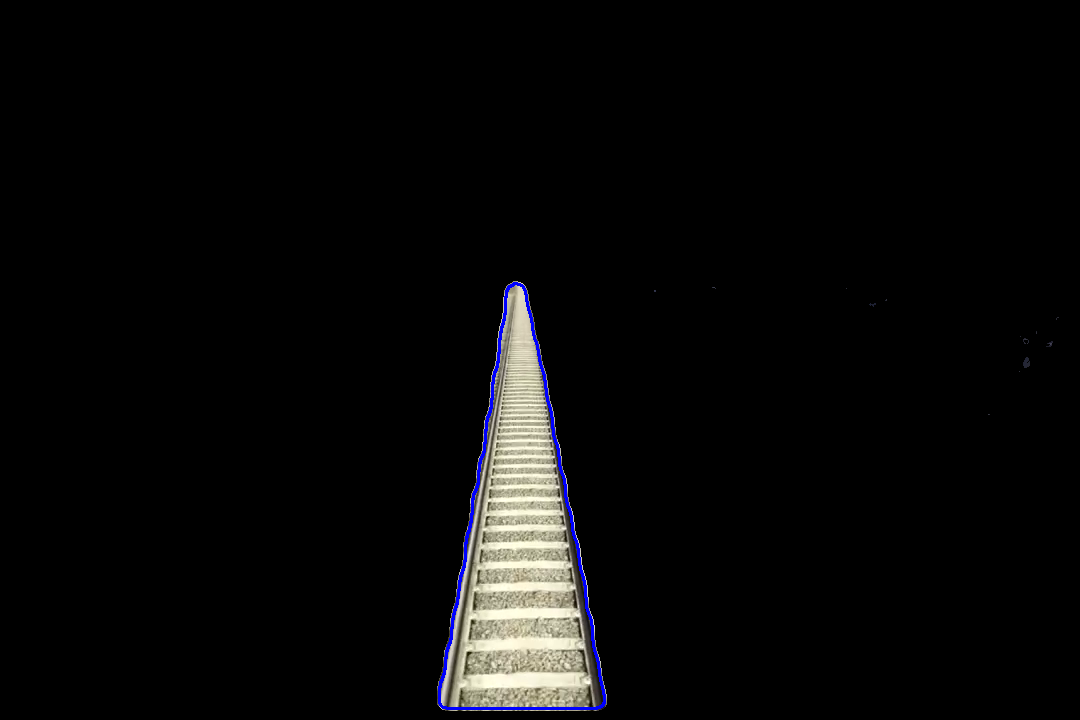

KeyboardInterrupt: ignored

In [ ]:
while(cap.isOpened()):
    ret, frame = cap.read()

#------------------

    outputt = objectdetection(frame, test_model)

#------------------

    outputt = BlueMask2TrainLine(outputt)

#------------------

    outputt = objectdetection(outputt, test_model1)
    out.write(outputt)
    cv2_imshow(outputt)

#------------------

    c = cv2.waitKey(10)
    if c & 0xFF == ord('q'):
        break

    if ret == False:
        break
 
cap.release()
cv2.destroyAllWindows()